<a href="https://colab.research.google.com/github/DavidCastro88/ProjectsData/blob/main/MissionsLaunchesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analysis of data from space mission launches***

***Questions:***

Which organization launched the most space missions in a given year?

How many launches were made per year?

How has the cost of a space mission changed over time?

What months are the most popular for releases?

Have space missions become safer or have the chances of failure remained unchanged?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/ProjectsData/main/Datasets/mission_launches.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [29]:
data = data.iloc[:, 2:]

In [30]:
data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [32]:
data['Organisation'].value_counts()

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

In [33]:
data.isnull().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

### ***Which organization launched the most space missions in a given year?***

In [34]:
from datetime import datetime

def convertir_fecha(fecha):
  if len(fecha)>16:
    return datetime.strptime(fecha,"%a %b %d, %Y %H:%M %Z")
  else:
    return datetime.strptime(fecha,"%a %b %d, %Y")

In [35]:
data['Date'] = data['Date'].apply(convertir_fecha)

In [36]:
data['Date'] = pd.to_datetime(data['Date'])

In [37]:
data['Year'] = data['Date'].dt.year

In [40]:
grouped = data.groupby(['Year', 'Organisation']).size().reset_index(name='counts')

In [78]:
grouped

,Year,Organisation,counts
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [51]:
idx = grouped.groupby('Year')['counts'].idxmax()
idx

Year
1957      0
1958      6
1959     10
1960     15
1961     19
       ... 
2016    583
2017    611
2018    616
2019    632
2020    649
Name: counts, Length: 64, dtype: int64

In [52]:
results = grouped.loc[idx, ['Year', 'Organisation', 'counts']]
results

,Year,Organisation,counts
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23
...,...,...,...
583,2016,CASC,22
611,2017,SpaceX,18
616,2018,CASC,37
632,2019,CASC,27


In [71]:
year = int(input('Ingrese el año de búsqueda: '))
organisation = results[results['Year']==year]
print(f'The organisation that launched the most space missions in {year} was {organisation.values[0][1]} with a total of {organisation.values[0][2]} missions')

Ingrese el año de búsqueda: 2000
The organisation that launched the most space missions in 2000 was Arianespace with a total of 12 missions


### ***How many launches were made per year?***

In [75]:
missions_by_year = data.groupby('Year').size().reset_index(name='total_missions')
missions_by_year

,Year,total_missions
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [77]:
year = int(input('Enter the search year: '))
results_mpery = missions_by_year[missions_by_year['Year']==year]['total_missions'].values[0]
print(f'The total missions launched in the year {year} was {results_mpery}')

Enter the search year: 2000
The total missions launched in the year 2000 was 57


### ***How has the cost of a space mission changed over time?***

In [79]:
data_price = data.dropna()
data_price

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020
...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00,Titan IIIB | KH-8,StatusRetired,59.0,Success,1966
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,1965
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,1965
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,1964


In [83]:
data_price['Price'] = data_price['Price'].str.replace(',', '').astype(float)

<ipython-input-83-4caa9d394670>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_price['Price'] = data_price['Price'].str.replace(',', '').astype(float)


In [86]:
avg_price_by_year = data_price.groupby('Year')['Price'].mean().reset_index()
avg_price_by_year

,Year,Price
0,1964,63.230000
1,1965,63.230000
2,1966,59.000000
3,1967,196.625000
4,1968,279.200000
5,1969,609.500000
6,1970,1160.000000
7,1971,1160.000000
8,1972,1160.000000
9,1973,1160.000000


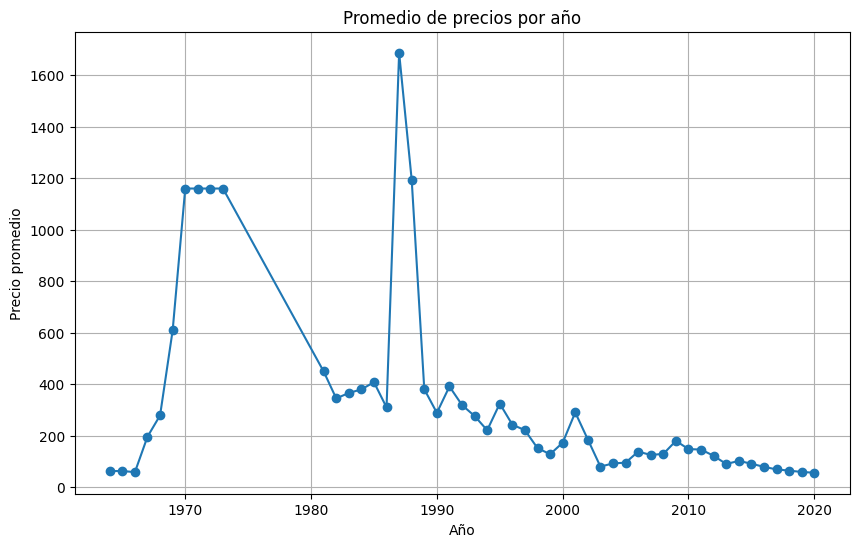

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year['Year'], avg_price_by_year['Price'], marker='o', linestyle='-')
plt.title('Promedio de precios por año')
plt.xlabel('Año')
plt.ylabel('Precio promedio')
plt.grid(True)
plt.show()

### ***What months are the most popular for releases?***

In [95]:
data['Month'] = data['Date'].dt.month

In [97]:
missions_by_month = data.groupby('Month').size().reset_index(name='total_missions')
missions_by_month

,Month,total_missions
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


The months most populars for releases are December and June

#### ***Have space missions become safer or have the chances of failure remained unchanged?***

In [103]:
data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [104]:
total_records = data.groupby('Year').size().reset_index(name='Total_Records')
success_records = data[data['Mission_Status'] == 'Success'].groupby('Year').size().reset_index(name='Success_Records')
result_data = pd.merge(total_records, success_records, on='Year', how='left')
result_data

,Year,Total_Records,Success_Records
0,1957,3,2
1,1958,28,6
2,1959,20,8
3,1960,39,19
4,1961,52,32
...,...,...,...
59,2016,90,86
60,2017,92,84
61,2018,117,113
62,2019,109,100


In [107]:
result_data['% Success'] = result_data['Success_Records']/result_data['Total_Records'] *100
result_data

,Year,Total_Records,Success_Records,% Success
0,1957,3,2,66.666667
1,1958,28,6,21.428571
2,1959,20,8,40.000000
3,1960,39,19,48.717949
4,1961,52,32,61.538462
...,...,...,...,...
59,2016,90,86,95.555556
60,2017,92,84,91.304348
61,2018,117,113,96.581197
62,2019,109,100,91.743119


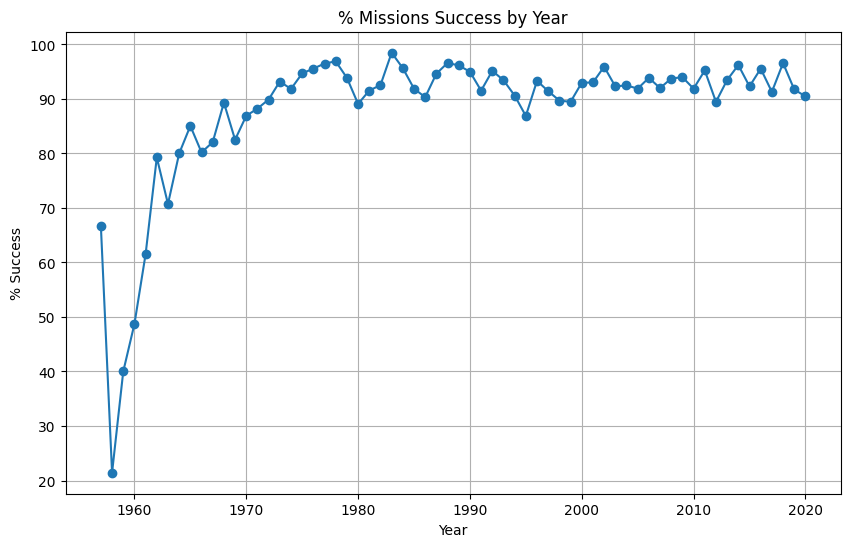

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(result_data['Year'], result_data['% Success'], marker='o', linestyle='-')
plt.title('% Missions Success by Year')
plt.xlabel('Year')
plt.ylabel('% Success')
plt.grid(True)
plt.show()